In [71]:
import os
import pandas as pd 
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
%matplotlib inline
from nltk.corpus import stopwords
stops = stopwords.words('english')
import nltk
nltk.download('all')
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

data = pd.read_csv('Presidents_speeches.csv')
data = data.drop(columns = ['Unnamed: 0'])
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data = data.drop(columns = ['Date','Inaugural Address'])
data['PresYear'] = data.Year.map(str) + ' ' + data.Name.map(str)

# Unique presidents in the data set.
len(data.Name.unique())

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

39

In [72]:
# Remove capitalization and punctuation from our corpus to easily identify and count unique words.
def text_cleaning(text):
    clean1 = re.sub(r'['+ string.punctuation + '’—”'+']', "", text.lower())
    return re.sub(r'\W+', ' ', clean1)
data['tokenized'] = data['text'].map(lambda x: text_cleaning(x))

# No of words in each speech
data['num_wds'] = data['tokenized'].apply(lambda x: len(x.split()))

# Unique words in each speech
data['uniq_wds'] = data['tokenized'].str.split().apply(lambda x: len(set(x)))

#words15 = [w for w in words15 if w not in stop_words]
data['tokenized'] = data['text'].map(lambda x: text_cleaning(x))
data.head(3)

,Name,Party,text,Year,PresYear,tokenized,num_wds,uniq_wds
0,George Washington,Other,Fellow-Citizens of the Senate and of the House...,1789,1789 George Washington,fellowcitizens of the senate and of the house ...,1427,594
1,George Washington,Other,Fellow Citizens: I AM again cal...,1793,1793 George Washington,fellow citizens i am again called upon by the...,135,90
2,John Adams,Other,"WHEN it was first perceived, in early times, t...",1797,1797 John Adams,when it was first perceived in early times tha...,2317,794


1. Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary?

In [73]:
# President with most and least vocabulary
max_vocabulary = data[data['uniq_wds'] == data['uniq_wds'].max()].Name
min_vocabulary = data[data['uniq_wds'] == data['uniq_wds'].min()].Name
print("President with the most vocabulary: " + max_vocabulary.to_string(index=False))
print("President with the least vocabulary: " + min_vocabulary.to_string(index=False))

President with the most vocabulary:  William Henry Harrison
President with the least vocabulary:  George Washington


In [74]:
# Mean vocabulary for different party presidents
party_grp = data.groupby('Party')
party_grp['uniq_wds'].agg(np.mean)

Party
Democratic    711.227273
Other         784.083333
Republican    811.541667
Name: uniq_wds, dtype: float64

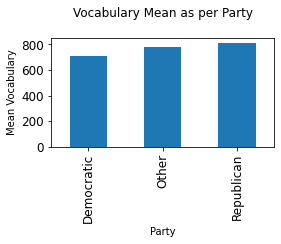

In [75]:
# Plotting mean vocabulary for different parties
ax=party_grp['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=12, figsize=(4,2))
ax.set_title('Vocabulary Mean as per Party\n', fontsize=12)
ax.set_ylabel('Mean Vocabulary', fontsize=10)
ax.set_xlabel('Party', fontsize=10);

In [76]:
# Removing stop words from speech

def removeStopWords(text) :
    words = text.split()
    words = [w for w in words if w not in stops]
    return words

data['vocab_words'] = removeStopWords(data['tokenized'].str)
data['uniq_wds'] = data['vocab_words'].apply(lambda x: len(set(x)))

2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in this sample of presidential speeches. Color code this barplot as blue for Democrats, red for Republican, and gray for Others.

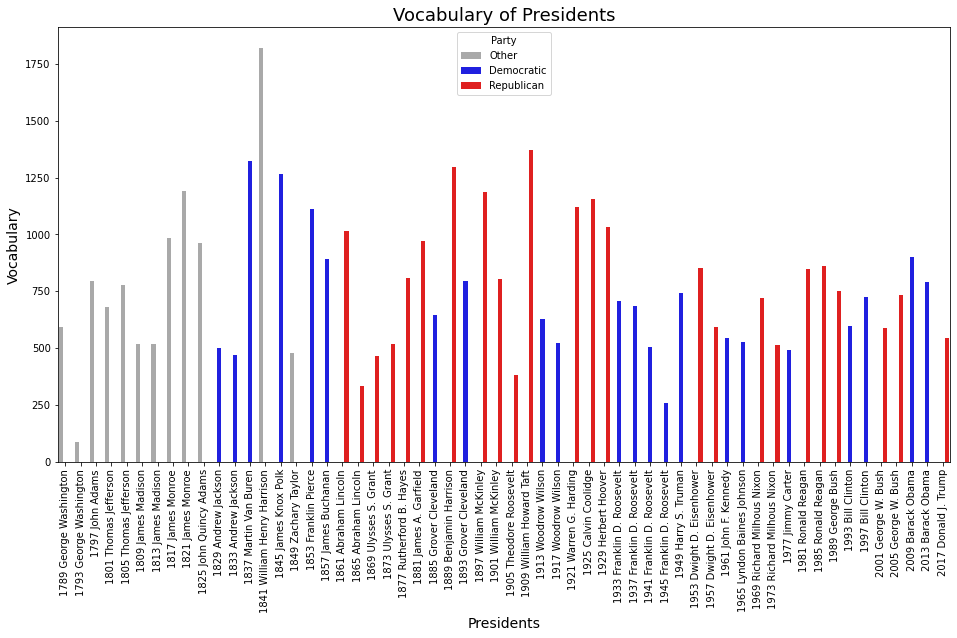

In [77]:
colors = ['#A9A9A9', '#0000FF', '#FF0000']
plt.figure(figsize=(16, 8))
plt.xticks(rotation='vertical')
ax = sns.barplot(x="PresYear", y="uniq_wds", hue="Party", data=data, palette=colors)
ax.set_title('Vocabulary of Presidents', fontsize=18)
ax.set_ylabel('Vocabulary', fontsize=14)
ax.set_xlabel('Presidents', fontsize=14)
plt.show()

3. What are the five most frequently used words (exclusive of stop words) used by each president? Do Democratic presidents use a different set of words than Republican presidents? 

In [78]:
# 5 most frequently used words by each president
def fiveCommonWords(text):
    words = nltk.tokenize.word_tokenize(speech)
    words = [w for w in words if w not in stops]
    words = [w for w in words if w.isalpha()]
    most_appears = Counter(words).most_common(5) 
    return ', '.join([word[0] for word in most_appears])

for i in data.index:
    speech = data.loc[i, 'tokenized']
    data.loc[i, 'Top 5 Freq Words'] = fiveCommonWords(speech)

data[['Name', 'Year', 'Top 5 Freq Words']].style.hide_index()

Name,Year,Top 5 Freq Words
George Washington,1789,"every, government, public, may, present"
George Washington,1793,"shall, oath, fellow, citizens, called"
John Adams,1797,"people, government, may, nations, country"
Thomas Jefferson,1801,"government, us, may, let, fellowcitizens"
Thomas Jefferson,1805,"public, may, fellowcitizens, state, us"
James Madison,1809,"nations, public, country, well, peace"
James Madison,1813,"war, country, united, every, british"
James Monroe,1817,"great, government, states, people, us"
James Monroe,1821,"great, states, would, united, war"
John Quincy Adams,1825,"union, government, upon, rights, peace"


In [79]:
# Grouping president based on Party
party_grp = data.groupby('Party')
other = party_grp.get_group('Other')
demo = party_grp.get_group('Democratic')
repub = party_grp.get_group('Republican')

# Merging all the president speeches from the same party
demo_speech = pd.Series(demo.tokenized).str.cat(sep=' ')
repub_speech = pd.Series(repub.tokenized).str.cat(sep=' ')

# Get 5 most frequent words for democratic and republican party
print('5 most frequent words::')
print('Democratic party: ' + fiveCommonWords(demo_speech))
print('Republican party: ' + fiveCommonWords(repub_speech))

5 most frequent words::
Democratic party: america, american, people, country, one
Republican party: america, american, people, country, one


4. Compute a sentiment (positive/negative) for each president, and draw three barplots of Democratic, Republican, and other presidents in chronological order. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group?

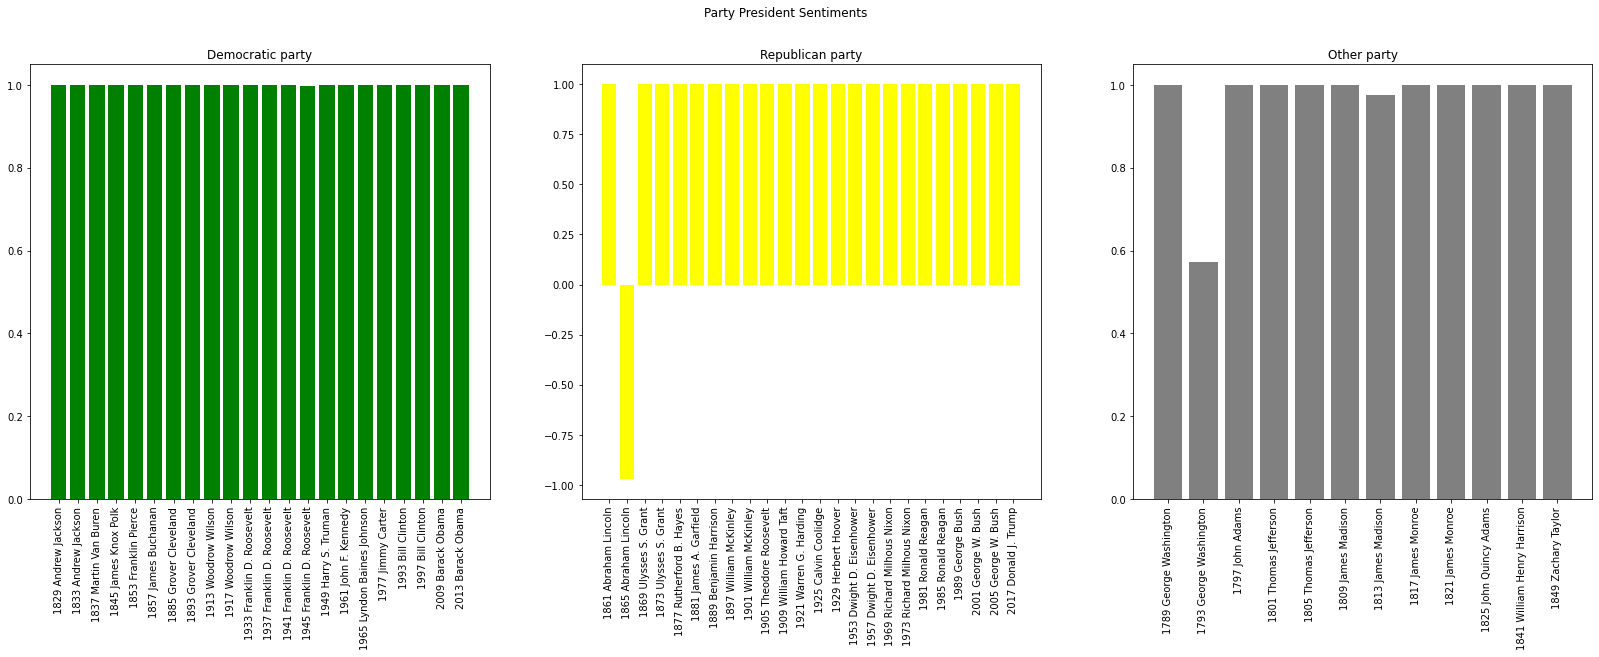

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Computing sentiment score for each president
for i in data.index:
    speech_text = data.loc[i, 'tokenized']
    sentiment = analyzer.polarity_scores(speech_text)
    polarity = sentiment['compound']
    data.loc[i, 'polarity'] = polarity

# Grouping president based on Party
party_grp = data.groupby('Party')
other = party_grp.get_group('Other')
demo = party_grp.get_group('Democratic')
repub = party_grp.get_group('Republican')

# Plot of president sentiments from different parties
plt.figure(figsize=(28, 8))

plt.subplot(131)
plt.bar(demo.PresYear, demo.polarity, color = 'green')
plt.xticks(rotation='vertical')
plt.title('Democratic party')

plt.subplot(132)
plt.bar(repub.PresYear, repub.polarity, color = 'yellow')
plt.xticks(rotation='vertical')
plt.title('Republican party')

plt.subplot(133)
plt.bar(other.PresYear, other.polarity, color = 'grey')
plt.xticks(rotation='vertical')
plt.title('Other party')

plt.suptitle('Party President Sentiments')
plt.show()

In [68]:
# Mean sentiment score of every party
party_gp['polarity'].agg(np.mean)

Party
Democratic    0.999591
Other         0.962150
Republican    0.917725
Name: polarity, dtype: float64

In [69]:
# Dropping duplicate rows with same president name, parties and sentiment polarity.
data = data.drop_duplicates(['Name', 'Party', 'polarity'])

# Top three presidents with the highest positive sentiment in each group
sorted_df = data.sort_values(by=['polarity', 'Party'],ascending=False).groupby('Party')['Name', 'Party', 'polarity'].head(3)
print('Top 3 presidents with the highest positive sentiment in each group are: ')
sorted_df.style.hide_index()

Top 3 presidents with the highest positive sentiment in each group are: 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


Name,Party,polarity
Rutherford B. Hayes,Republican,1.000000
Benjamin Harrison,Republican,1.000000
William McKinley,Republican,1.000000
John Adams,Other,1.000000
James Monroe,Other,1.000000
William Henry Harrison,Other,1.000000
James Knox Polk,Democratic,1.000000
Franklin Pierce,Democratic,1.000000
Harry S. Truman,Democratic,1.000000
